In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# test result for sumorl model
def make_one_df(input_path, output_path):
    
    num_tests = 6
    file_paths = [f'{input_path}/test_{i}.csv' for i in range(1, num_tests+1)]

    all_data = []
    for file_path in file_paths:
        data = pd.read_csv(file_path)
        all_data.append(data)

    concatenated_data = pd.concat(all_data, ignore_index=True)
    concatenated_data.insert(0, 'test', concatenated_data.index+1)
    concatenated_data.to_csv(output_path,  index=False)

In [ ]:
output_andrea_path = 'outputs - test/Andrea/all_tests.csv'
output_sumorl_path = 'outputs - test/sumo_rl/all_tests.csv'
output_basictls_path = 'outputs - test/BasicTLS/all_tests.csv'
output_sumorl_final_path = "outputs - ablation/final_model/all_tests.csv"

make_one_df('outputs - test/Andrea', output_andrea_path)
make_one_df('outputs - test/BasicTLS', output_basictls_path)
make_one_df('outputs - test/sumo_rl',output_sumorl_path)
make_one_df('outputs - ablation/final_model/tests',output_sumorl_final_path)


data_andrea = pd.read_csv(output_andrea_path)
data_sumorl = pd.read_csv(output_sumorl_path)
data_basictls = pd.read_csv(output_basictls_path)
data_sumorl_final = pd.read_csv(output_sumorl_final_path)

In [ ]:
data_sumorl.rename(columns={"accumulated_average_fuel_consumption": "accumulated_avg_fuel_consumption"}, inplace=True)
data_sumorl_final.rename(columns={"accumulated_average_fuel_consumption": "accumulated_avg_fuel_consumption"}, inplace=True)

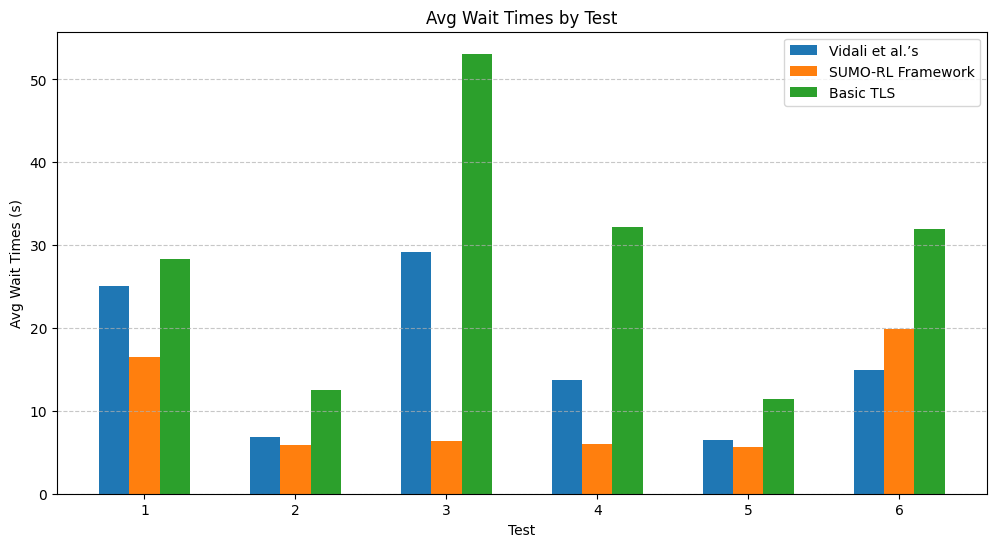

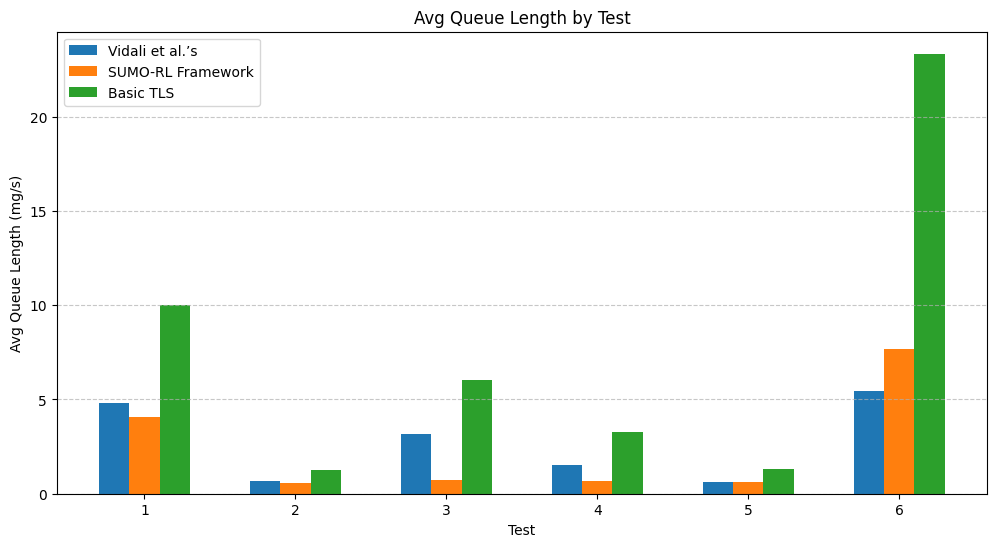

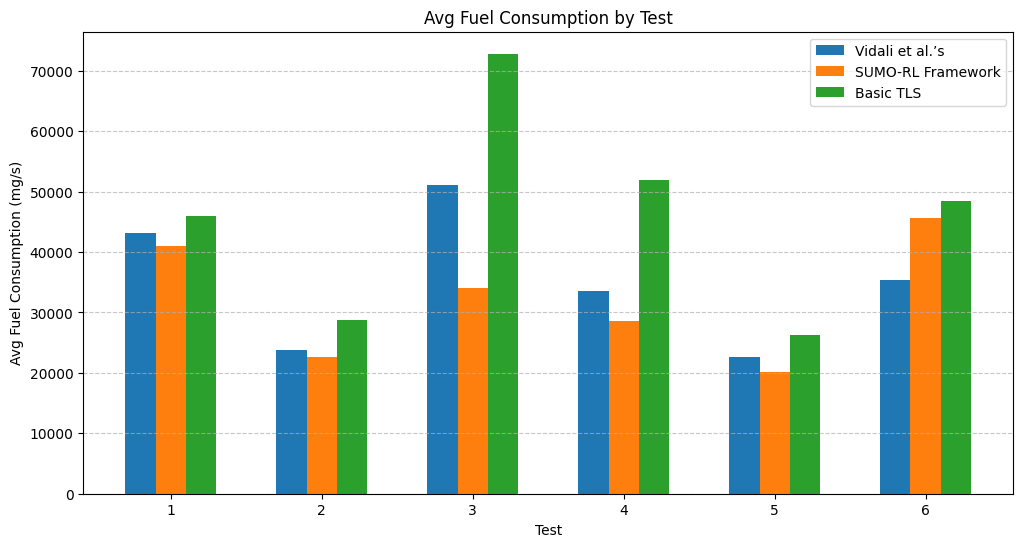

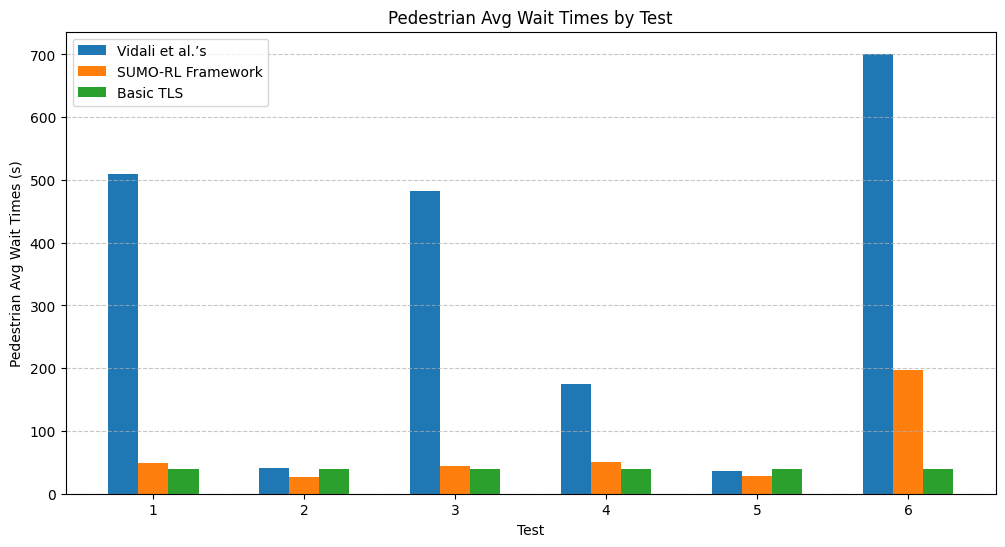

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

labels = ['accumulated_avg_wait_times', 'accumulated_avg_queue_length' , 'accumulated_avg_fuel_consumption', 'accumulated_pedestrian_avg_wait_times']

for y in labels:

# y ='accumulated_avg_wait_times'
    tests = sorted(data_sumorl['test'].unique())

    # Extract avg waiting time for each dataframe
    andrea_waiting_times = [data_andrea[data_andrea['test'] == t][y].values[0] for t in tests]
    sumorl_waiting_times = [data_sumorl[data_sumorl['test'] == t][y].values[0] for t in tests]
    # sumorl_final_waiting_times = [data_sumorl_final[data_sumorl_final['test'] == t][y].values[0] for t in tests]
    basictls_waiting_times = [data_basictls[data_basictls['test'] == t][y].values[0] for t in tests]

    # Define the bar chart settings
    bar_width = 0.2
    x = np.arange(len(tests))  # Positions for the `test` values

    name = " ".join([word.capitalize() for word in y.split("_")[1:]])
    # Plot each dataframe's bar
    plt.figure(figsize=(12, 6))
    plt.bar(x - bar_width, andrea_waiting_times, bar_width, label='Vidali et al.’s')
    plt.bar(x , sumorl_waiting_times, bar_width, label='SUMO-RL Framework')
    # plt.bar(x, sumorl_final_waiting_times, bar_width, label='SUMO-RL Modified Framework')
    plt.bar(x + bar_width, basictls_waiting_times, bar_width, label='Basic TLS')

    # Add titles, labels, and legend
    plt.title(f'{name} by Test')
    plt.xlabel('Test')
    if(y == 'accumulated_avg_wait_times' or y == 'accumulated_pedestrian_avg_wait_times'):
        name = name + ' (s)'
    else:
        name = name +' (mg/s)'
    plt.ylabel(name)
    plt.xticks(x, tests)  # Set the `test` values as x-axis labels
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save and show the chart
    plt.savefig(f'plots/bar_chart__new_model_{y}.png', dpi=300, bbox_inches='tight')
    plt.show()
